## 1-3 NEURAL NETWORKS


In [3]:
import torch

### nn 을 쉽게 쓸 수 있다

In [2]:
import torch.nn as nn

#### torch.nn

***
##### Parameters :  
* torch.nn.Parameter : 모듈 파라미터로 취급되는 torch.Tensor.<br>

*** 
##### Containers :  
###### Module  
* torch.nn.Modules.Module : 모든 nn modules 의 base class. 내가 만들 모델은 이 클래스를 상속받아야 한다. 트리처럼 다른 모듈을 안에 멤버로 추가할 수 있다.  

###### Sequential  
* torch.nn.Modules.Container.Sequential : 아래와 같이 modules 을 순서대로 줄지어 담는 container 다. 

```python3
# Example of using Sequential
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

# Example of using Sequential with OrderedDict
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))
```

###### ModuleList  
* torch.nn.Modules.Container.ModuleList : 아래와 같이 submodules 을 리스트로 묶어준다.

```python3
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])

    def forward(self, x):
        # ModuleList can act as an iterable, or be indexed using ints
        for i, l in enumerate(self.linears):
            x = self.linears[i // 2](x) + l(x)
        return x
```

###### ModuleDict  
* torch.nn.Modules.Container.ModuleDict : 아래와 같이 이번엔 딕셔너리로 묶어주는데, OrderedDict 로 묶어준다. 우선 장점은 전체 nn 중에 어느 부분을 선택적으로 돌려볼 수 있다는 것

```python3
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.choices = nn.ModuleDict({
                'conv': nn.Conv2d(10, 10, 3),
                'pool': nn.MaxPool2d(3)
        })
        self.activations = nn.ModuleDict([
                ['lrelu', nn.LeakyReLU()],
                ['prelu', nn.PReLU()]
        ])

    def forward(self, x, choice, act):
        x = self.choices[choice](x)
        x = self.activations[act](x)
        return x
```

###### ParameterList  
* torch.nn.Modules.Container.ParameterList : 파라미터를 명시적으로 다룰 때, 파라미터 매트릭스들을 리스트로 묶어서 다룰 수 있게 해주는 클래스로, 아래는 가장 원초적인 뉴럴넷이라고 볼수도 있다.  

```python3  
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.params = nn.ParameterList([nn.Parameter(torch.randn(10, 10)) for i in range(10)])

    def forward(self, x):
        # ParameterList can act as an iterable, or be indexed using ints
        for i, p in enumerate(self.params):
            x = self.params[i // 2].mm(x) + p.mm(x)
        return x
```

###### ParameterDict  
* torch.nn.Modules.Container.ParameterDict : 앞서와 같이 파라미터를 명시적으로 다루고, ModuleDict 처럼 OrderedDict 로 묶고, 쓸 수 있다.  

```python3
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.params = nn.ParameterDict({
                'left': nn.Parameter(torch.randn(5, 10)),
                'right': nn.Parameter(torch.randn(5, 10))
        })

    def forward(self, x, choice):
        x = self.params[choice].mm(x)
        return x
```

*** 

##### Convolution Layers  
###### Conv1d  
* torch.nn.Modules.Conv.Conv1d : 1d convolution layer 

Pooling layers <br>
Padding layers <br>

Non-linear activations (weighted sum, nonlinearity) <br>
Non-linear activations (other) <br>

Normalization layers <br>
Recurrent layers <br>
Linear layers <br>
Dropout layers <br>
Sparse layers <br>

Distance functions <br>
Loss functions <br>

Vision layers <br>
DataParallel layers (multi-GPU, distributed) <br>
Utilities <br>

##### torch.nn.functional

Convolution functions <br>
Pooling functions <br>

Non-linear activation functions <br>

Normalization functions <br>
Linear functions <br>
Dropout functions <br>
Sparse functions <br>

Distance functions <br>
Loss functions <br>

Vision functions <br>
DataParallel functions (multi-GPU, distributed) <br>

##### torch.nn.init

### functional 은 Loss functions 을 가지고 있다

In [5]:
import torch.nn.functional as F

In [6]:
F.binary_cross_entropy

<function torch.nn.functional.binary_cross_entropy(input, target, weight=None, size_average=None, reduce=None, reduction='mean')>

### 클래스로 nn 을 상속받아서 쓰게 되는데, super 의 필요성 이해

In [1]:
class A:

   def __init__(self):

      print("Class A __init__()")



class B(A):

   def __init__(self):

      print("Class B __init__()")

      A.__init__(self)



class C(A):

   def __init__(self):

      print("Class C __init__()")

      A.__init__(self)





class D(B, C):

   def __init__(self):

      print("Class D __init__()")

      B.__init__(self)

      C.__init__(self)





d = D()


Class D __init__()
Class B __init__()
Class A __init__()
Class C __init__()
Class A __init__()


자식의 \__init__ 에서, 상속 받은 부모의 초기화도 명시적으로 일으켜 줘야 하는데,
단순하게 부모.\__init__(자식 self) 로 초기화하면, 할아버지가 두번 초기화될 수 있다.

In [10]:
class A:

   def __init__(self):

      print("Class A __init__()")

      super(A, self).__init__()



class B(A):

   def __init__(self):

      print("Class B __init__()")

      super(B, self).__init__()



class C(A):

   def __init__(self):

      print("Class C __init__()")

      super(C, self).__init__()



class D(B, C):

   def __init__(self):

      print("Class D __init__()")

      super(D, self).__init__()



d = D()

Class D __init__()
Class B __init__()
Class C __init__()
Class A __init__()


즉, 클래스를 사용하는 입장에서 전체 클래스의 상속 구조를 이해하지 못하였어도,

문제 없이 상속을 사용할 수 있다. 



super() 함수는 슈퍼클래스의 method를 호출하라는 의미인데, 이때 다수의 슈퍼 클래스가 존재시 클래스 호출 순서의 결정은 __mro__ 를 통해 결정된다. 



mro ( Method Resolution Order ) 가 무엇인지는 아래 링크 참고.

( 참고 : https://docs.python.org/2/library/stdtypes.html#class.__mro__ ) 



출처: https://bluese05.tistory.com/5 [ㅍㅍㅋㄷ]

In [11]:
D.__mro__

(__main__.D, __main__.B, __main__.C, __main__.A, object)

### nn.Module 은 모든 nn 의 base

In [12]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 위 모델의 parameter 를 쉽게 얻을 수 있다

In [13]:
net.parameters()

<generator object Module.parameters at 0x7fb02b18c990>

In [14]:
list(net.parameters())

[Parameter containing:
 tensor([[[[ 0.0623, -0.1410, -0.0564],
           [-0.0342,  0.0625,  0.0374],
           [ 0.1252, -0.3076,  0.0517]]],
 
 
         [[[ 0.1001,  0.2556, -0.3091],
           [-0.0172, -0.3038, -0.1821],
           [-0.0274, -0.0769, -0.1789]]],
 
 
         [[[-0.2749, -0.2646, -0.0847],
           [ 0.0913, -0.2380, -0.2493],
           [ 0.0461, -0.0290, -0.2117]]],
 
 
         [[[ 0.3260,  0.2752,  0.1075],
           [ 0.2759,  0.1382, -0.0258],
           [-0.1293,  0.3322, -0.1018]]],
 
 
         [[[ 0.1862, -0.2659,  0.2752],
           [ 0.2574, -0.1659,  0.1699],
           [ 0.2017,  0.1421,  0.2142]]],
 
 
         [[[-0.0239,  0.3108,  0.1631],
           [ 0.0331, -0.0232,  0.2585],
           [ 0.1691,  0.1968, -0.2451]]]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1429,  0.1548, -0.2199,  0.0841,  0.0280, -0.0112],
        requires_grad=True),
 Parameter containing:
 tensor([[[[ 2.8176e-02, -7.1398e-02, -1.0590e-01],
           [

In [16]:
params = list(net.parameters())

### 컨볼루션 레이어1 : 3x3 필터. 채널 1개로, 아웃풋 하나씩 6개.

In [39]:
params[0].size()

torch.Size([6, 1, 3, 3])

In [18]:
params[0] #         self.conv1 = nn.Conv2d(1, 6, 3)

Parameter containing:
tensor([[[[ 0.0623, -0.1410, -0.0564],
          [-0.0342,  0.0625,  0.0374],
          [ 0.1252, -0.3076,  0.0517]]],


        [[[ 0.1001,  0.2556, -0.3091],
          [-0.0172, -0.3038, -0.1821],
          [-0.0274, -0.0769, -0.1789]]],


        [[[-0.2749, -0.2646, -0.0847],
          [ 0.0913, -0.2380, -0.2493],
          [ 0.0461, -0.0290, -0.2117]]],


        [[[ 0.3260,  0.2752,  0.1075],
          [ 0.2759,  0.1382, -0.0258],
          [-0.1293,  0.3322, -0.1018]]],


        [[[ 0.1862, -0.2659,  0.2752],
          [ 0.2574, -0.1659,  0.1699],
          [ 0.2017,  0.1421,  0.2142]]],


        [[[-0.0239,  0.3108,  0.1631],
          [ 0.0331, -0.0232,  0.2585],
          [ 0.1691,  0.1968, -0.2451]]]], requires_grad=True)

In [33]:
# bias term
params[1]

Parameter containing:
tensor([ 0.1429,  0.1548, -0.2199,  0.0841,  0.0280, -0.0112],
       requires_grad=True)

### 컨볼루션 레이어2 : 3x3 필터. (6개 채널로 들어왔으니) 채널 6개로, 아웃풋 하나씩 총 16개 출력.

In [21]:
params[2].size() #        self.conv2 = nn.Conv2d(6, 16, 3)

torch.Size([16, 6, 3, 3])

In [24]:
params[2][0]  #        self.conv2 = nn.Conv2d(6, 16, 3) 의 16개 출력 중 하나의 출력에 대해

tensor([[[ 0.0282, -0.0714, -0.1059],
         [ 0.0255, -0.0602,  0.1140],
         [-0.0348, -0.0950,  0.0865]],

        [[-0.0369,  0.0374, -0.1078],
         [-0.0696,  0.0577,  0.1015],
         [-0.0053, -0.0489,  0.0967]],

        [[-0.0955,  0.0159,  0.0935],
         [-0.0327,  0.1016,  0.0168],
         [-0.0164,  0.0090,  0.0118]],

        [[ 0.0009, -0.0447, -0.0873],
         [ 0.1341,  0.0511, -0.0898],
         [-0.0569, -0.1292,  0.0082]],

        [[-0.0795, -0.0079, -0.0404],
         [ 0.1079,  0.0675,  0.0977],
         [-0.0645, -0.1119, -0.0859]],

        [[ 0.0122,  0.1104,  0.0909],
         [ 0.0187, -0.1033,  0.0194],
         [ 0.0145, -0.0721,  0.0531]]], grad_fn=<SelectBackward>)

In [36]:
# bias term

params[3].size()

torch.Size([16])

In [26]:
params[4].size()

torch.Size([120, 576])

In [35]:
# bias term

params[5].size()

torch.Size([120])

In [28]:
params[6].size()

torch.Size([84, 120])

In [37]:
# bias term

params[7].size()

torch.Size([84])

In [30]:
params[8].size()

torch.Size([10, 84])

In [38]:
# bias term

params[9].size()

torch.Size([10])

### forward 를 정의했으니, fowarding 할 수 있다

In [40]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0684, -0.0383,  0.0439,  0.0313, -0.0694,  0.0046, -0.0438,  0.0717,
          0.0969, -0.0400]], grad_fn=<AddmmBackward>)


### backward 를 정의할 필요 없이 autograd 된다 zero_grad 로 grad 를 0으로 초기화. 하고 backward로 grad 계산

In [52]:
net.zero_grad()
net.fc3.weight.grad

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [53]:
out.backward(torch.randn(1, 10))

In [54]:
net.fc3.weight.grad

tensor([[ 2.2363e-02,  1.8729e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          9.3359e-03,  5.8549e-02,  7.4339e-03,  8.1638e-03,  6.5985e-03,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  2.7347e-02,
          0.0000e+00,  4.5950e-02,  4.6414e-03,  0.0000e+00,  0.0000e+00,
          4.0231e-03,  3.2551e-02,  0.0000e+00,  2.6269e-03,  0.0000e+00,
          1.0993e-01,  0.0000e+00,  0.0000e+00,  4.0588e-02,  4.4260e-02,
          0.0000e+00,  0.0000e+00,  5.0767e-02,  6.9859e-02,  2.4037e-02,
          0.0000e+00,  7.7362e-03,  0.0000e+00,  0.0000e+00,  2.8516e-02,
          4.2302e-04,  7.6087e-03,  0.0000e+00,  2.4468e-02,  0.0000e+00,
          1.7232e-02,  3.2360e-03,  1.3148e-02,  0.0000e+00,  0.0000e+00,
          1.6472e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  4.7848e-02,
          0.0000e+00,  0.0000e+00,  5.8236e-03,  0.0000e+00,  1.6180e-02,
          0.0000e+00,  5.5082e-02,  0.0000e+00,  0.0000e+00,  2.7610e-02,
          1.7441e-02,  0.0000e+00,  2.

In [55]:
net.fc3.weight.grad.size()

torch.Size([10, 84])

In [56]:
net.fc3.weight.size()

torch.Size([10, 84])

In [57]:
net.fc3.bias.size()

torch.Size([10])

In [58]:
out = net(input)
print(out)

tensor([[ 0.0684, -0.0383,  0.0439,  0.0313, -0.0694,  0.0046, -0.0438,  0.0717,
          0.0969, -0.0400]], grad_fn=<AddmmBackward>)


### 이제 얻은 grad 로 update 쳐보자 모든 파라미터에 대해 계산
##### weight = weight - learning_rate * gradient

In [59]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [60]:
out = net(input)
print(out)

tensor([[ 0.0693,  0.0085,  0.0037,  0.0609, -0.0147,  0.0085, -0.0713,  0.0685,
          0.0868, -0.1189]], grad_fn=<AddmmBackward>)


### 대충 결과를 얻어서 backward 하지 말고, loss 를 취해보자

In [61]:
output = net(input)

In [62]:
output

tensor([[ 0.0693,  0.0085,  0.0037,  0.0609, -0.0147,  0.0085, -0.0713,  0.0685,
          0.0868, -0.1189]], grad_fn=<AddmmBackward>)

In [64]:
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
target

tensor([[ 0.8145,  1.2536,  0.6594, -0.3000, -2.3208,  0.1724,  2.1806, -0.3897,
          0.2618, -0.0501]])

In [65]:
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.3327, grad_fn=<MseLossBackward>)


### 정의한 loss 로 backward

In [66]:
loss.backward()

In [67]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [68]:
out = net(input)
print(out)

tensor([[ 0.0748,  0.0614, -0.0279,  0.0828,  0.0210,  0.0100, -0.0909,  0.0703,
          0.0824, -0.1995]], grad_fn=<AddmmBackward>)


### 이 최적화 과정을 optim 라이브러리로부터 편하게 갖다가 쓸 수 있다

In [69]:
import torch.optim as optim

### optimizer 만들고

In [70]:
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)


### grad 값 초기화하고

In [71]:
# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers


### 돌리고 loss 얻고

In [72]:
output = net(input)
loss = criterion(output, target)

### backprop 하고 optimizer 를 step 해서 update 한다

In [73]:
loss.backward()
optimizer.step()

In [83]:
from torchviz import make_dot, make_dot_from_trace

In [78]:
!pip install tensorboardX

    100% |################################| 225kB 3.0MB/s ta 0:00:01
    100% |################################| 1.2MB 1.1MB/s ta 0:00:011


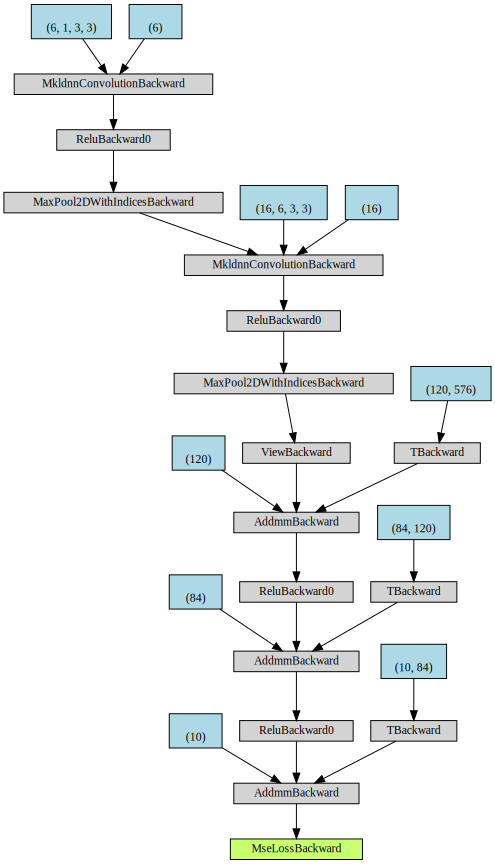

In [84]:
make_dot(loss)

In [82]:
!apt-get update
!apt-get -y install python-pydot python-pydot-ng graphviz

Hit:1 http://security.ubuntu.com/ubuntu xenial-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu xenial InRelease
Get:3 http://archive.ubuntu.com/ubuntu xenial-updates InRelease [109 kB]
Get:4 http://archive.ubuntu.com/ubuntu xenial-backports InRelease [107 kB]
Fetched 216 kB in 2s (93.8 kB/s) 
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  file fontconfig fontconfig-config fonts-dejavu-core fonts-liberation
  libcairo2 libcdt5 libcgraph6 libdatrie1 libfontconfig1 libfreetype6 libgd3
  libglib2.0-0 libglib2.0-data libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b
  libice6 libicu55 libjbig0 libltdl7 libmagic1 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libpython-stdlib libpython2.7-minimal libpython2.7-stdlib libsm6
  libthai-data libthai0 libtiff5 libvpx3 libx11-6 libx11-data libxau6 libxaw7
  libxcb-render0 l